# The Task
- build a model to p redict the likelihood of default, a model which can generalize to other data points. The column to be predicted is the 'default payment next month'.

# Variables
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Summary
- Models Used:
    - Logistic Regression
    - Random Forest
    - Gaussian Naive Bayes
    - KNearest Neighbours
    - XGBoost
- Final Model:
    - XGBoost
        - Accuracy: 79%
        - Precision: 78%
        - Recall: 79%
        - F1 Score: 79%

# Table of Contents
### 1.1 Quick Analysis / Statistics of Dataset
- df.info()
- df.describe()
### 1.2 Exploratory Data Analysis
- Plots and Distributions of Data
### 2.1 Data Cleaning
- Some variables are in ORDINAL maatter
- will OneHotEncode them instead
- Train / Test Split
### 2.2 Data Preprocessing
- Feature Scaling
- Pipeline
### 3.1 Baseline Modeling
- Several different models for baseline
- Run through preprocessing pipeline 
- Results from baseline modeling without feature engineering/feature selection/model hyperparameter tuning
### 3.2 Feature Selection + Handling Imbalanced
- SelectKBest
- SMOTE
- RandomUnderSampling
### 3.3 Hyperparameter Tuning
- GridSearchCV
### 3.4 Testing on hold out Test data set
- XGBoost
    - Accuracy: 79%
    - Precision: 78%
    - Recall: 79%
    - F1 Score: 79%
### 4.0 Recommendations And Next Steps

# Import Packages

In [1]:
!pip install xlrd

In [2]:
!pip install xgboost

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('default of credit card clients.xls')

In [5]:
# changing the first row of the dataframe to column headers 
df.columns = df.iloc[0]
df.drop(0, inplace = True)

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 1.1 Quick Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [8]:
df.describe().T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


- The average mean limiting balance of customers is 167100
- Average age is 35.5 years, standard deviation of 9.2
- Education level mostly graduate school and university

In [9]:
df.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

- no missing values

## 1.2 Exploratory Data Analysis

In [10]:
# changing data types of dataframe from object to float
for i in df.columns:
    df[i] = df[i].astype(float)

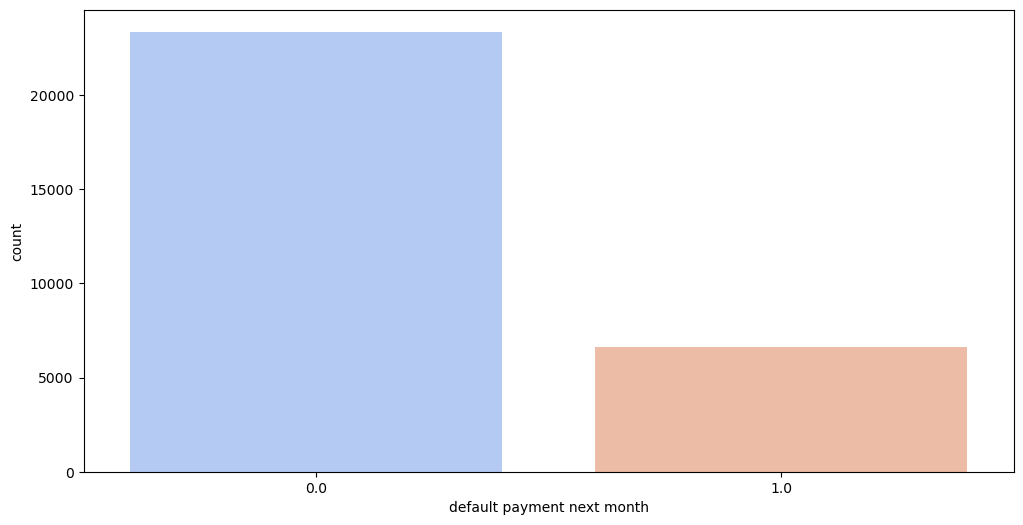

In [11]:
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'default payment next month', palette = 'coolwarm')
plt.show()

In [12]:
df['default payment next month'].value_counts()

0.0    23364
1.0     6636
Name: default payment next month, dtype: int64

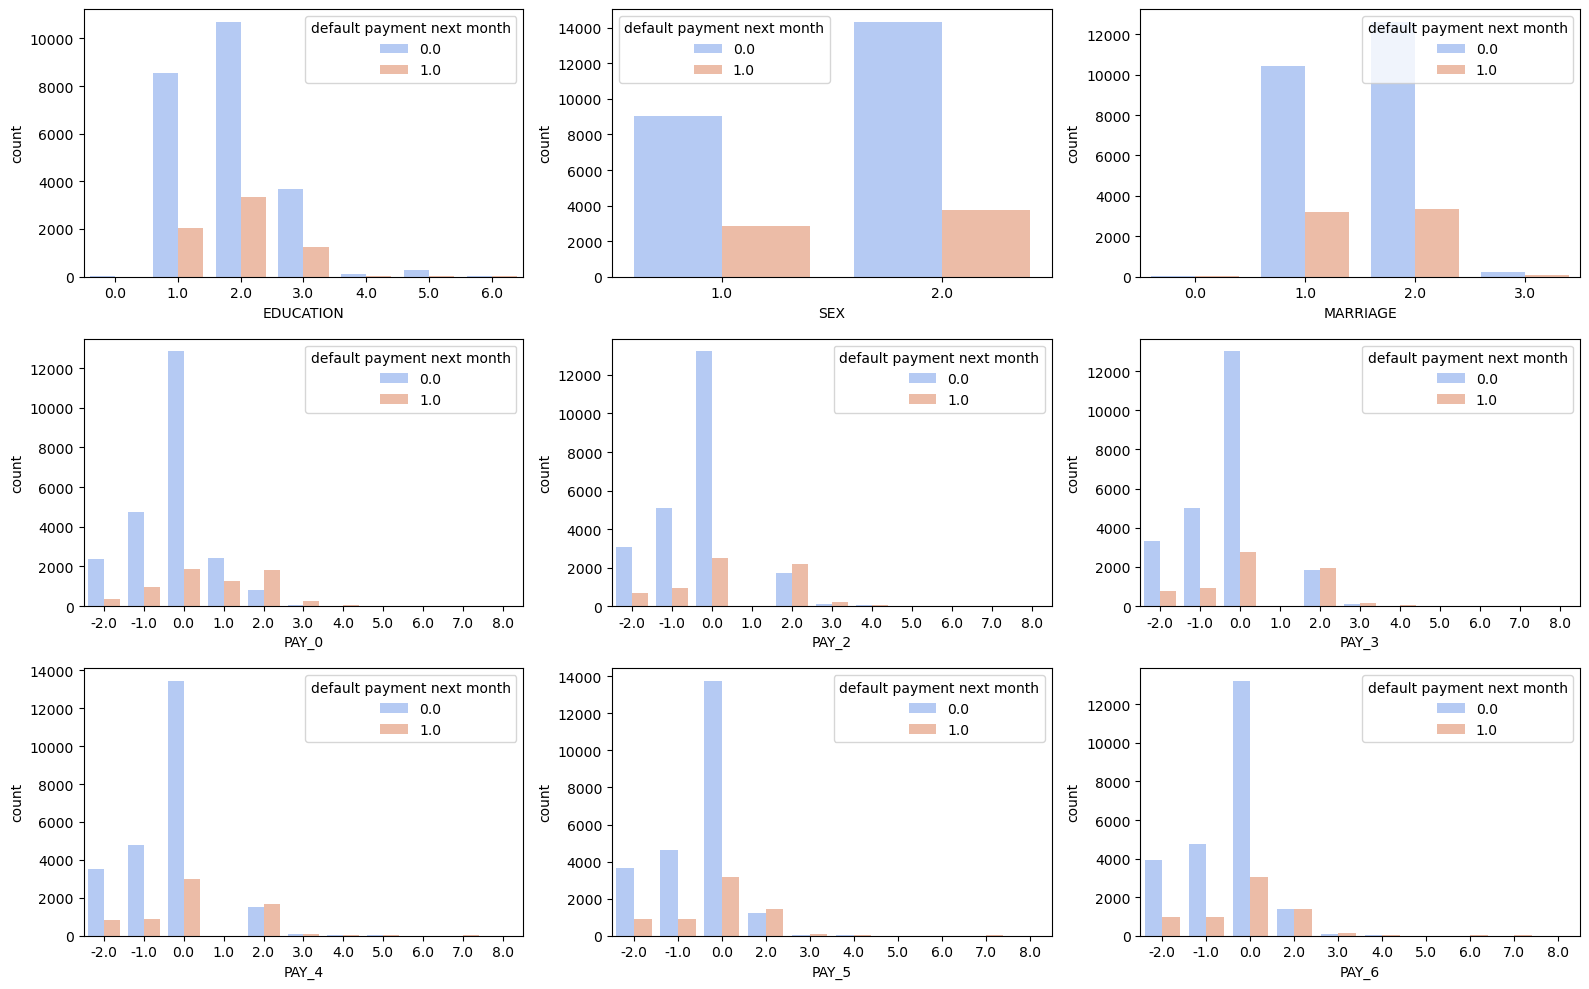

In [13]:
df_cat = df[['EDUCATION','SEX','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]

fig = plt.figure(figsize = (16, 10))
j = 0

for i in df_cat.columns:
    plt.subplot(3, 3, j+1)
    j += 1
    sns.countplot(data = df, x = i, hue = 'default payment next month', palette = 'coolwarm')

plt.tight_layout()
plt.show()


- people in graduate school, university, and high school are highly close to making default payments
- single people are most likely to default followed by married people
- many default payments after 2 months of delay

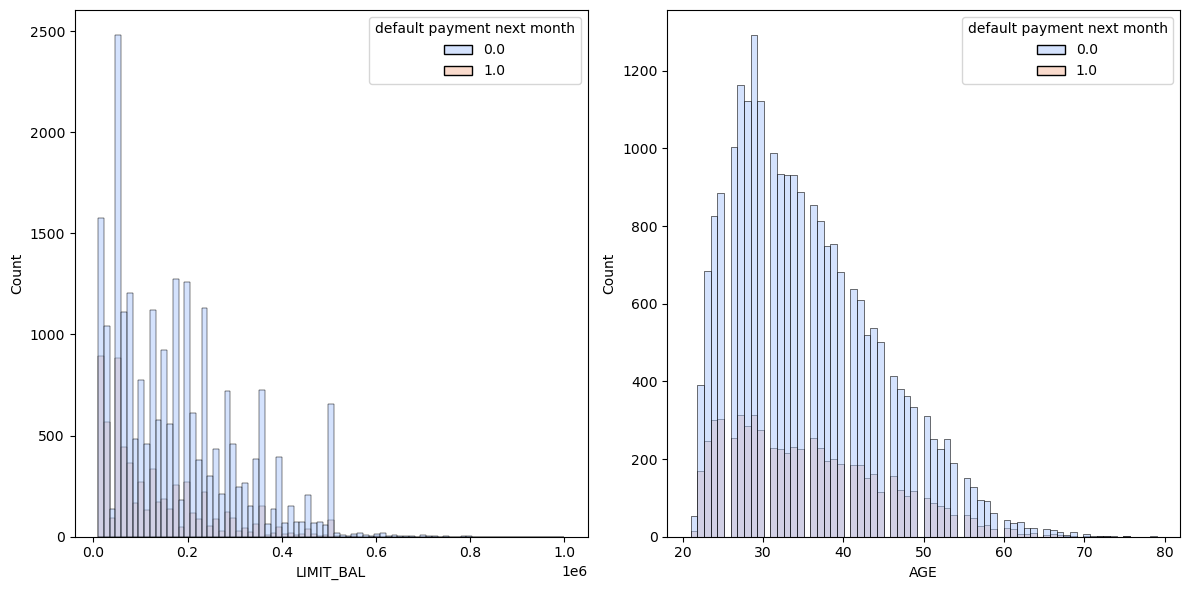

In [14]:
df_num= df[['LIMIT_BAL', 'AGE']]

fig = plt.figure(figsize = (12, 6))
j = 0

for i in df_num.columns:
    plt.subplot(1, 2, j+1)
    j += 1
    sns.histplot(data = df, x = i, hue = 'default payment next month', palette = 'coolwarm')

plt.tight_layout()
plt.show()


- main age group around 20-30 age (positively skewed)
- 

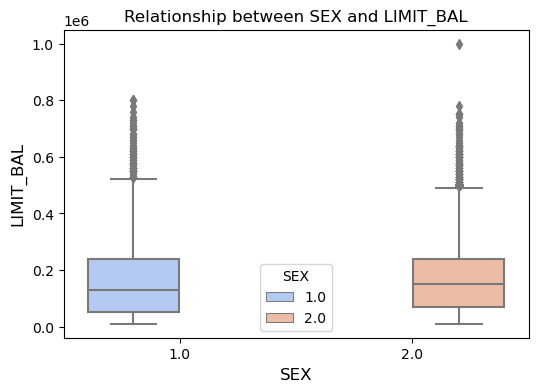

In [15]:
# Set the figure size
plt.figure(figsize = (6, 4))

# Plot the relationship using seaborn
sns.boxplot(data = df, x = 'SEX', y = 'LIMIT_BAL', hue = 'SEX', palette = 'coolwarm')

# Set the plot title and axis labels
plt.title('Relationship between SEX and LIMIT_BAL')
plt.xlabel('SEX', fontsize = 12)
plt.ylabel('LIMIT_BAL', fontsize = 12)

# Display the plot
plt.show()

- credit limit balanced between both genders

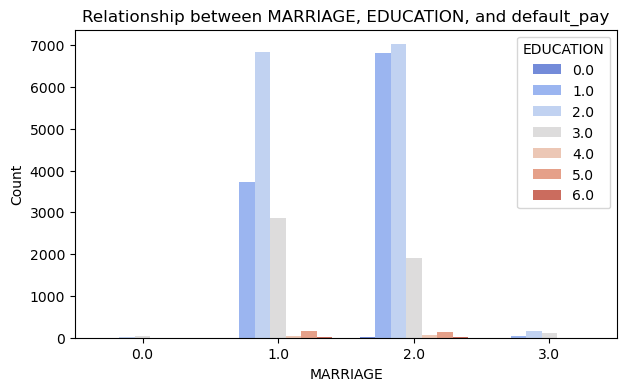

In [16]:
# checking to see if there's any relationship between single and education level
# Plotting the relationship between variables
plt.figure(figsize = (7,4))
sns.countplot(x = "MARRIAGE", hue = "EDUCATION", data = df, palette = 'coolwarm')
plt.title("Relationship between MARRIAGE, EDUCATION, and default_pay")
plt.xlabel("MARRIAGE")
plt.ylabel("Count")

# Adjust the legend position
plt.legend(title = "EDUCATION", loc = "upper right")

plt.show()

- The graph shows that the university students are most likely to default when they are single. However, both university students and highschool students are likely to default when they are married. Does marriage and university has something to do with being default?

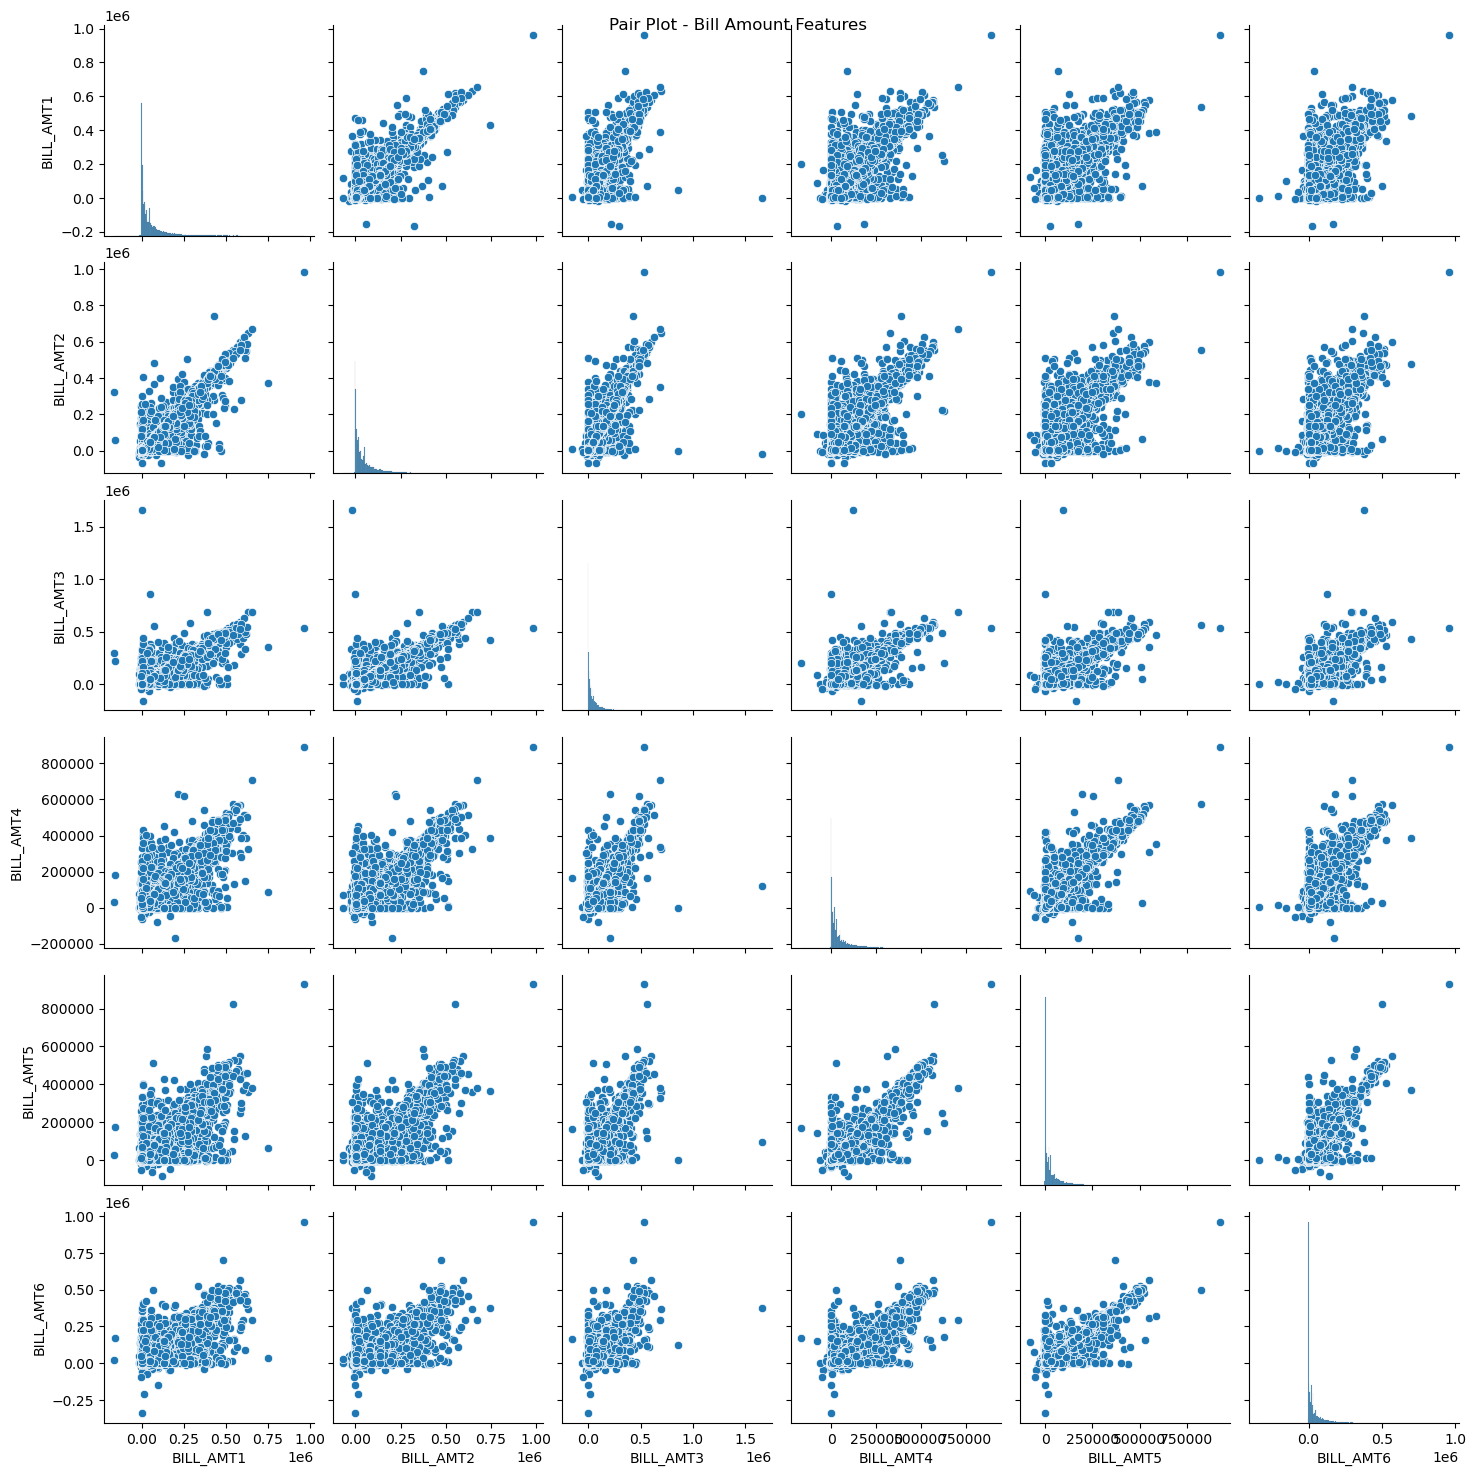

In [17]:
# Select the bill amount columns
bill_amounts = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

sns.pairplot(bill_amounts)

plt.suptitle('Pair Plot - Bill Amount Features')
plt.show()

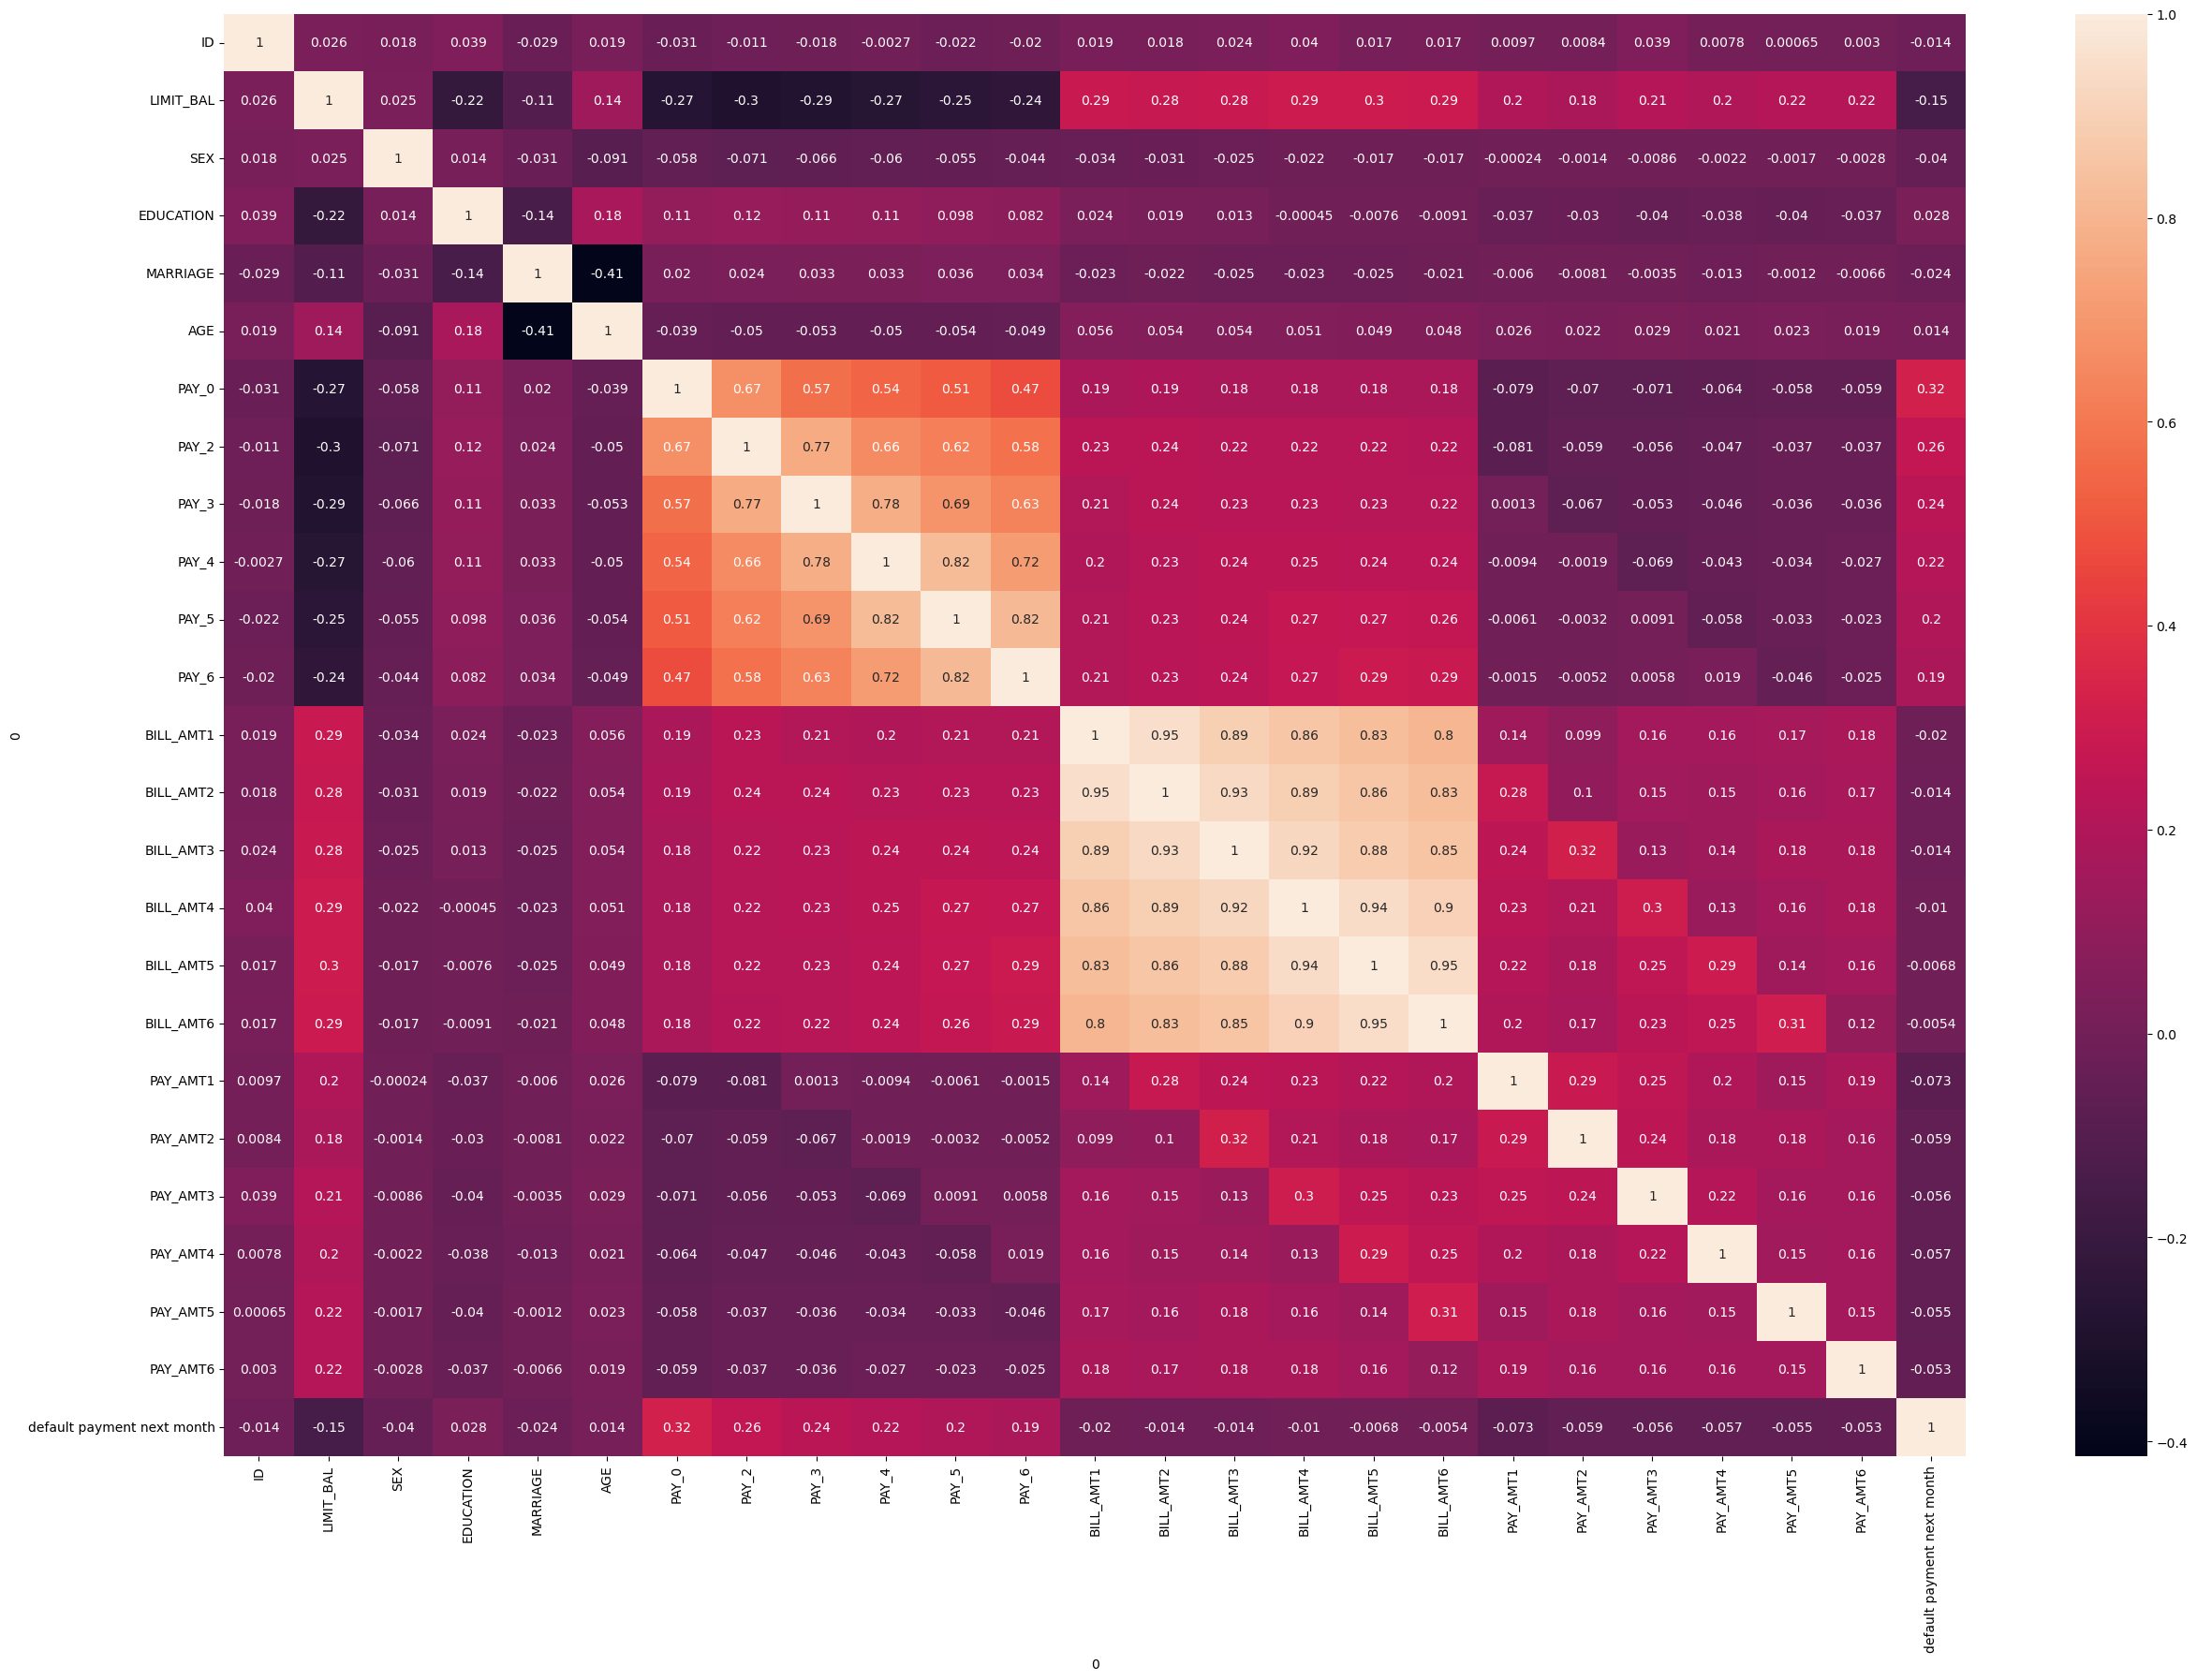

In [18]:
plt.subplots(figsize = (30,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

# 2.1 Data Cleaning
- Some variables are in ORDINAL maatter
- will OneHotEncode them instead
- Train / Test Split

In [19]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,4.0,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [20]:
df1 = pd.get_dummies(df, columns = ['EDUCATION','MARRIAGE','SEX'])

- Splitting data into train and test sets for further data cleaning/imputation to avoid data leakage

In [21]:
training_data = df1.sample(frac = 0.8, random_state = 3)
testing_data = df1.drop(training_data.index)

In [22]:
# Splitting training data to train and validation sets
X = training_data.drop(['ID','default payment next month'],axis = 1)
y = training_data['default payment next month']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 3, stratify = y)

# 2.2 Data Preprocessing

- Feature Scaling
- Pipeline

In [51]:
base_model = LogisticRegression()

numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3','PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

numerical_transformer = Pipeline(steps = [
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
    transformers = [
        ('num_transformer', numerical_transformer, numerical_cols)
    ],
    remainder = 'passthrough'
    )

pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', base_model)
])

In [52]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6'])])),
                ('classifier', LogisticRegression())])

In [53]:
cvs = cross_validate(pipeline, X_train, y_train, cv = 5, scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc'])

In [54]:
preds = pipeline.predict(X_val)
  
pd.DataFrame({'original test set':y_val, 'predictions': preds})

,original test set,predictions
16997,0.0,0.0
1649,0.0,0.0
25302,0.0,0.0
23151,0.0,0.0
6904,1.0,0.0
...,...,...
26400,0.0,0.0
26691,0.0,0.0
9877,0.0,0.0
2929,0.0,0.0


In [55]:
print(classification_report(y_val, preds))
print(confusion_matrix(y_val, preds))

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      3740
         1.0       0.73      0.25      0.37      1060

    accuracy                           0.81      4800
   macro avg       0.78      0.61      0.63      4800
weighted avg       0.80      0.81      0.78      4800

[[3645   95]
 [ 797  263]]


- Baseline Logistic Regression scores
- 3640 correctly classified 0's (no default)
- 242 correctly classified 1's (default)
- 107 incorrectly classified 1's (False negative)
    - Predicted no default but they were actually default
- 811 incorrectly classified 0's (false positive)
    - Predicted default, but they were actually no default

# 3.1 Baseline Modeling
- several differnt models for baseline
- run through preprocessing pipeline
- results from baseline modeling without feature engineering/feature selection/model hyperparameter tuning


In [29]:
def baseline_models(X_train, y_train, X_val, y_val, preprocessor, num_feats):
    """
    Function to run baseline model results across several different algorithms
    :params X_train -> pd.DataFrame: Input features training dataframe
    :params y_train -> pd.DataFrame: Output dependant variable training dataframe
    :params X_val -> pd.DataFrame: Input features validation training dataframe
    :params y_val -> pd.DataFrame: Output dependent variable validation dataframe
    :params preprocessor -> object: Preprocessor object
    :params num_feats -> List: list of numerical features
    :returns final -> pd.DataFrame: Dataframe with results from baseline models
    """
    
    dfs = []
    models = [
        ('GNB', GaussianNB()),
        ('LogReg', LogisticRegression()),
        ('RF', RandomForestClassifier()),
        ('KNN', KNeighborsClassifier()),
        ('XGB', XGBClassifier())
    ]
    
    results = []
    names = []
    scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
    prec_score = []
    recall = []
    f1 = []
    
    for name, model in models:
        print(f'Fitting {name} model')
        pipeline = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('model', model)
        ])
        
        cvs = cross_validate(pipeline, X_train, y_train, cv = 3, scoring = scoring)
        results.append(cvs)
        names.append(name)
        
        df = pd.DataFrame(cvs)
        df['model'] = name
        
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)
        
        prec_score.append(precision_score(y_val, y_pred, average = 'weighted'))
        recall.append(recall_score(y_val, y_pred, average = 'weighted'))
        f1.append(f1_score(y_val, y_pred, average = 'weighted'))
        
        dfs.append(df)
    
    predictions = pd.DataFrame([prec_score, recall, f1], columns = ['GNB','LogReg','RF','KNN','XGB'], 
                                   index = ['Precision','Recall','F1'])
    
    final = pd.concat(dfs, ignore_index = True)
    
    return final, predictions
    

In [30]:
df_scores, preds = baseline_models(X_train, y_train, X_val, y_val, preprocessor, numerical_cols)

Fitting GNB model
Fitting LogReg model
Fitting RF model
Fitting KNN model
Fitting XGB model


In [31]:
df_scores

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.013012,0.020018,0.283594,0.768535,0.283594,0.208248,0.730662,GNB
1,0.012011,0.020018,0.296563,0.764369,0.296563,0.232901,0.733458,GNB
2,0.011011,0.020017,0.291250,0.766982,0.291250,0.222541,0.747232,GNB
3,0.062057,0.016015,0.811406,0.796495,0.811406,0.772596,0.714346,LogReg
4,0.062057,0.017015,0.805625,0.785322,0.805625,0.765832,0.720563,LogReg
5,0.063057,0.016015,0.812500,0.798128,0.812500,0.774561,0.724198,LogReg
6,3.075403,0.208190,0.806875,0.785345,0.806875,0.785577,0.758359,RF
7,3.153862,0.209190,0.810469,0.789940,0.810469,0.788770,0.750687,RF
8,3.245956,0.207188,0.821875,0.805378,0.821875,0.801463,0.774222,RF
9,0.009008,0.383243,0.793281,0.772613,0.793281,0.777871,0.700774,KNN


In [32]:
preds

,GNB,LogReg,RF,KNN,XGB
Precision,0.748230,0.801598,0.794428,0.772240,0.793834
Recall,0.280417,0.814167,0.813750,0.793542,0.812917
F1,0.205186,0.776139,0.792729,0.777341,0.793968


- Best performing model is XGB highest F1 score

# 3.2 Feature Selection + Handling Imbalance
- SelectKBest
- SMOTE
- RandomUnderSampling

In [33]:
def select_features(X_train, y_train, score_func):
    fs = SelectKBest(score_func=score_func, k='all')
    fit = fs.fit(X_train, y_train)
    
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X_train.columns)
    
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Feature','Score']  #naming the dataframe columns
    featureScores = featureScores.sort_values('Score',ascending=False).head(15)
    plt.barh(featureScores['Feature'],featureScores['Score'])
    plt.show()
    
    return featureScores

In [34]:
X_fs = training_data.dropna().drop('default payment next month',axis=1)
y_fs = training_data.dropna()['default payment next month']

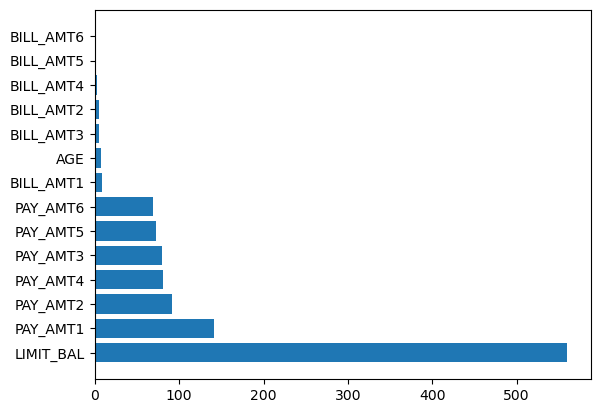

,Feature,Score
0,LIMIT_BAL,560.057134
8,PAY_AMT1,140.905728
9,PAY_AMT2,91.959691
11,PAY_AMT4,80.637670
10,PAY_AMT3,79.549106
12,PAY_AMT5,71.988960
13,PAY_AMT6,68.892357
2,BILL_AMT1,8.062011
1,AGE,7.557165
4,BILL_AMT3,4.931429


In [35]:
select_features(X_fs[numerical_cols], y_fs , f_regression)

In [36]:
# Random Under Sampling
rus = RandomUnderSampler(random_state = 42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

model = XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79      3740
         1.0       0.39      0.65      0.49      1060

    accuracy                           0.70      4800
   macro avg       0.64      0.68      0.64      4800
weighted avg       0.77      0.70      0.72      4800



- Improved scores for class 1

In [56]:
# SMOTE
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

model = XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      3740
         1.0       0.61      0.38      0.47      1060

    accuracy                           0.81      4800
   macro avg       0.73      0.66      0.68      4800
weighted avg       0.79      0.81      0.79      4800



In [68]:
pipeline = make_pipeline(preprocessor
                         , smote
                         , XGBClassifier()
                    )
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6'])])),
                ('smote', SMOTE(random_state=42))...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [69]:
y_pred = pipeline.predict(X_val)

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      3740
         1.0       0.60      0.40      0.48      1060

    accuracy                           0.81      4800
   macro avg       0.72      0.66      0.68      4800
weighted avg       0.79      0.81      0.79      4800



In [70]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_validate(pipeline, training_data.drop('default payment next month',axis=1), training_data['default payment next month'], scoring='roc_auc', cv=cv, n_jobs=-1)

In [71]:
pd.DataFrame(scores)

,fit_time,score_time,test_score
0,15.682237,0.019017,0.769481
1,15.630189,0.022020,0.787321
2,15.274867,0.017016,0.790322
3,16.119633,0.020018,0.764266
4,15.522092,0.019017,0.742529
5,15.395977,0.017015,0.741340
6,14.917542,0.018016,0.781066
7,15.793339,0.020018,0.761023
8,15.499073,0.017013,0.751949
9,15.962491,0.018017,0.760585


# 3.3 Hyperparameter Tuning
- GridSearchCV

In [64]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('estimator', XGBClassifier())
])

param_grid = {
    'estimator__n_estimators': range(60, 220, 40),
    'estimator__max_depth' : range(2, 10, 1),
    'estimator__learning_rate':[0.3, 0.1, 0.01, 0.05],
    'estimator': [XGBClassifier()]
}
grid = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 1, n_jobs = -1, scoring = 'roc_auc')

In [70]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_AMT6'])])),
                                       ('smote',...
                                                     max_delta_step=None,
                                                     max_depth=3,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     predictor=None,
                                                     random_state=None, ...)],
                         'estimator__learning_rate': [0.3, 0.1, 0.01, 0.05],
                         'estimator__max_depth': range(2, 10),
                         'estimator__n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=1)

In [71]:
grid.best_params_

{'estimator': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.05, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...),
 'estimator__learning_rate': 0.05,
 'estimator__max_depth': 3,
 'estimator__n_estimators': 100}

In [72]:
y_pred = grid.best_estimator_.predict(X_val)

In [73]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      3747
         1.0       0.52      0.52      0.52      1053

    accuracy                           0.79      4800
   macro avg       0.69      0.69      0.69      4800
weighted avg       0.79      0.79      0.79      4800



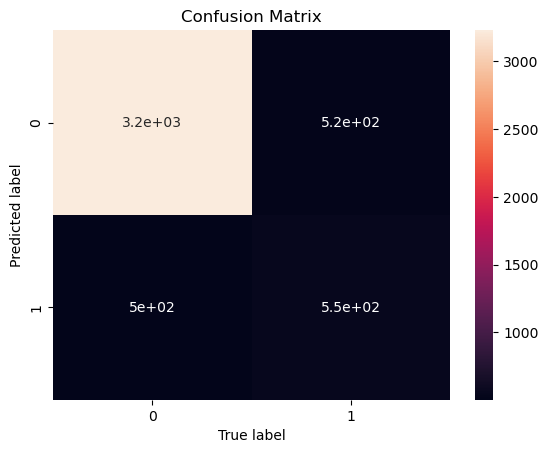

[[3231  516]
 [ 503  550]]


In [62]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True)
plt.ylabel('Predicted label')  
plt.xlabel('True label')  
plt.title("Confusion Matrix")
plt.show()
print(cm)

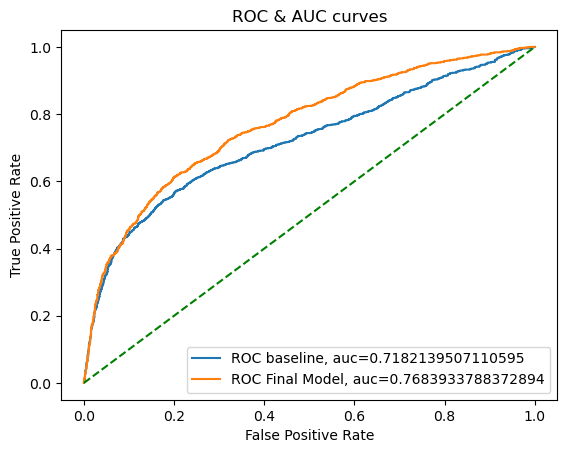

In [74]:
from sklearn import metrics

y_pred_proba = pipeline.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="ROC baseline, auc="+str(auc))

y_pred_proba = grid.best_estimator_.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="ROC Final Model, auc="+str(auc))


x = np.linspace(0,1,100)
y = x
plt.plot(x,y,color='green',linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC & AUC curves')
plt.legend(loc=4)
plt.show()

- Baseline Logisitic regression model roc_auc: 0.71
- Final XGBoost model roc_auc: 0.76
- There is a slight improvement from using SMOTE and XGBClassifier compared to the baseline logistic regression

# 3.4 Testing on hold out test data set

In [76]:
X_test = testing_data.drop(['default payment next month'],axis=1)
y_test = testing_data['default payment next month']

In [77]:
y_preds = grid.best_estimator_.predict(X_test)

In [78]:
print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4615
           1       0.54      0.52      0.53      1385

    accuracy                           0.79      6000
   macro avg       0.70      0.69      0.70      6000
weighted avg       0.78      0.79      0.79      6000



In [79]:
print(confusion_matrix(y_preds, y_test))

[[4001  614]
 [ 663  722]]


# 4.0 Recommendations and next steps

- In this specific case of predicting whether or not customers are going to default, I think we would want to optimize for precision
    - However, the choice of between optimizing for precision or recall depends on the specific business context and the costs associated with having false positives or false negatives and the priorities of the stakeholders
- Precision metric is the ratio of correct positive predictions to the total predicted positives.
    - In layman's term, this means of all the people that we predicted are going to default, how many were actually correct?
- Whereas, recall is the ratio of correct positive predictions to the total positives examples
    - In layman's term, this means of all the people that actually defaulted, how many were actually correct?
- precision is more important in this case because as a business if we are predicting customers who are going to default are "non credible" we don't want to approve a "bad" customer (false positive) who may never repay their credit back, thus, the bank will be losing money.
- Whereas, in recall, if we fail to identify/classify a "good" customer that is highly credible, we as a company/bank won't suffer great losses.
- False positives would be saying that we are approving a loan to a customer who is not eligible
- False negative would be saying that we are not approving a loan to a customer who is eligible
- High precision means low false positive
- High recall means low false negative

- Baseline Results using Logistic Regression for the (1) class we had precision=0.73, recall=0.25, f1-score=0.37
- Final model results using XGBoost for the (1) class we had precisio=0.52, recall=0.52, f1-score=0.52
    - trade off between higher recall for lower precision
- Using SMOTE to handle class imbalanced, we were able to slightly improve the metrics.
- For next steps, we can try more feature engineering, removing outliers, creating more features that will be relevant in predicting loan approvals or even trying to train a deep learning neural network model using Tensorflow/Keras